In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#import dataset
Mall_Customer = pd.read_csv('Mall_Customers.csv')
#print number of samples 
print("Number of datapoints:", len(Mall_Customer))
Mall_Customer.head()

Number of datapoints: 200


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#drop samples that has missing value
Mall_Customer = Mall_Customer.dropna()

Text(0, 0.5, 'Inertia')

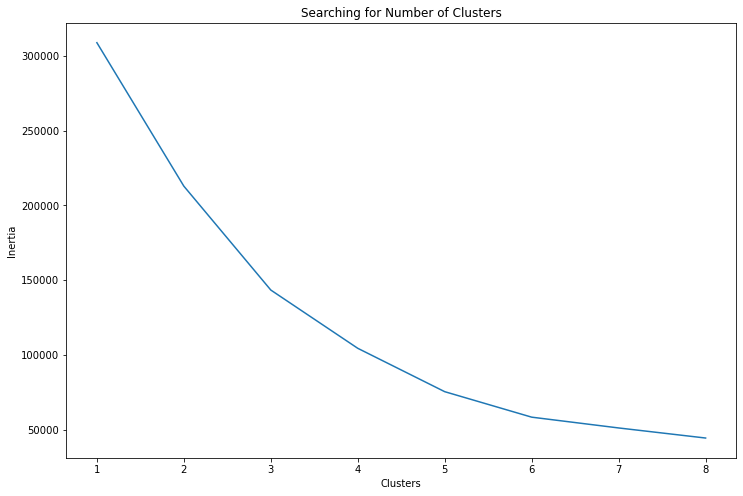

In [4]:
#drop customer ID and Gender column
X = Mall_Customer.drop(['CustomerID', 'Genre'], axis=1)


clusters = []

for i in range(1, 9):
    results = KMeans(n_clusters=i).fit(X)
    clusters.append(results.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 9)), y=clusters, ax=ax)
ax.set_title('Searching for Number of Clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


/Users/yaxingpan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


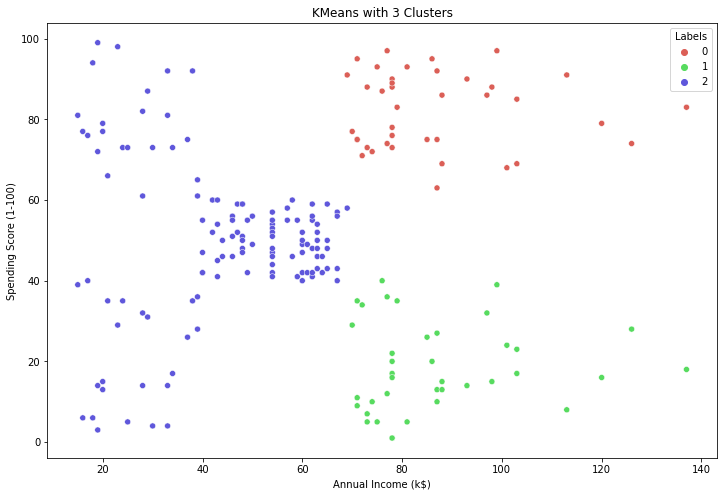

In [5]:
# Kmeans for 3 clusters
clusters_3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = clusters_3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

/Users/yaxingpan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


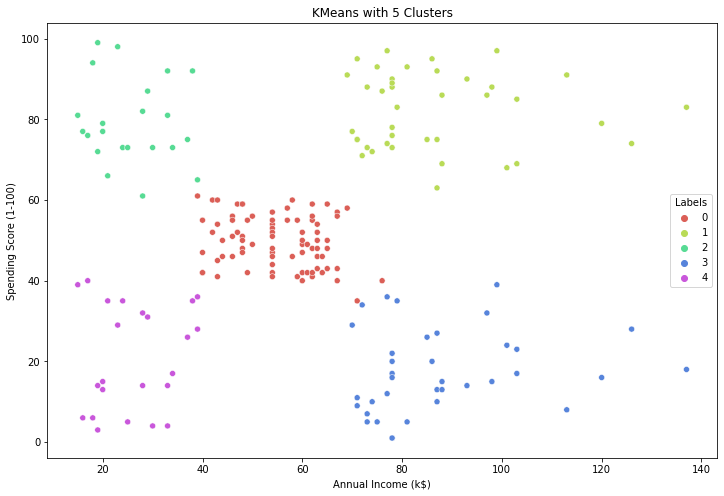

In [6]:
# Kmeans for 5 Clusters
clusters_5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = clusters_5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

/Users/yaxingpan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


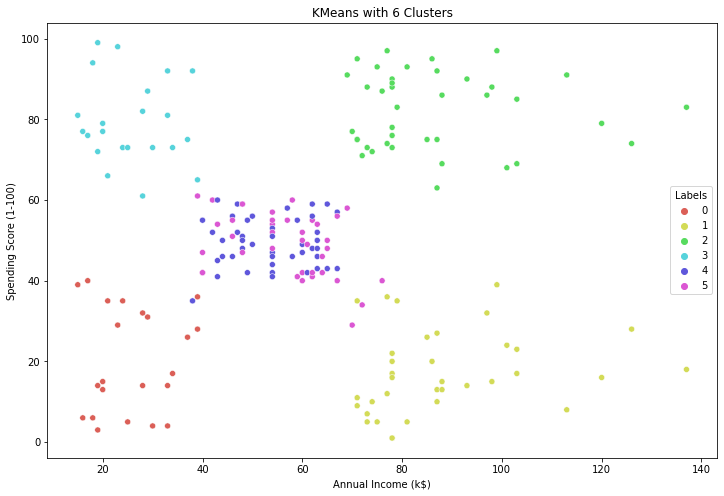

In [7]:
# Kmeans for 6 Clusters
clusters_6 = KMeans(n_clusters=6).fit(X)

X['Labels'] = clusters_6.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'],
                palette=sns.color_palette('hls', 6))
plt.title('KMeans with 6 Clusters')
plt.show()

22.19873428993702


/Users/yaxingpan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


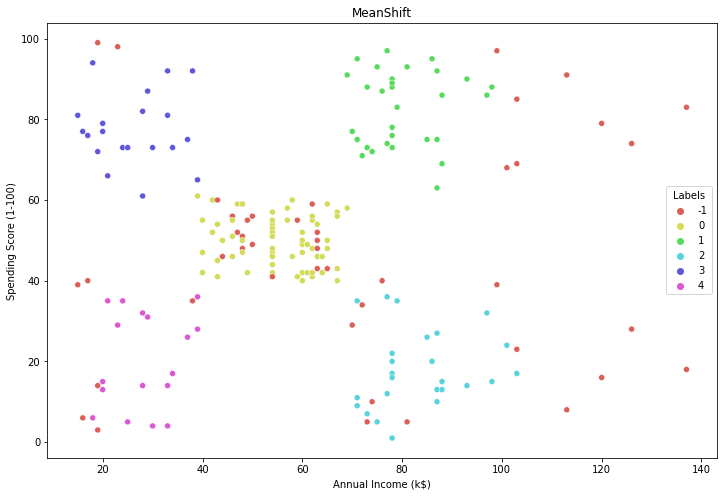

In [8]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X,quantile=0.1)
print(bandwidth)
db = MeanShift(bandwidth=bandwidth,cluster_all=False).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('MeanShift')
plt.show()


In [9]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.23742416  33.03028913 ... 117.1110584  124.47489707
  130.15759678]
 [ 42.23742416   0.          75.11990415 ... 111.83469945 137.80420893
  122.41323458]
 [ 33.03028913  75.11990415   0.         ... 129.87686476 122.18428704
  143.77065069]
 ...
 [117.1110584  111.83469945 129.87686476 ...   0.          57.07013229
   14.35270009]
 [124.47489707 137.80420893 122.18428704 ...  57.07013229   0.
   65.03076195]
 [130.15759678 122.41323458 143.77065069 ...  14.35270009  65.03076195
    0.        ]]


In [10]:
Z = hierarchy.linkage(dist, 'complete')

/var/folders/vz/qkzndqyn4p312z66d9kvrt6w0000gn/T/ipykernel_6767/3045749611.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'complete')


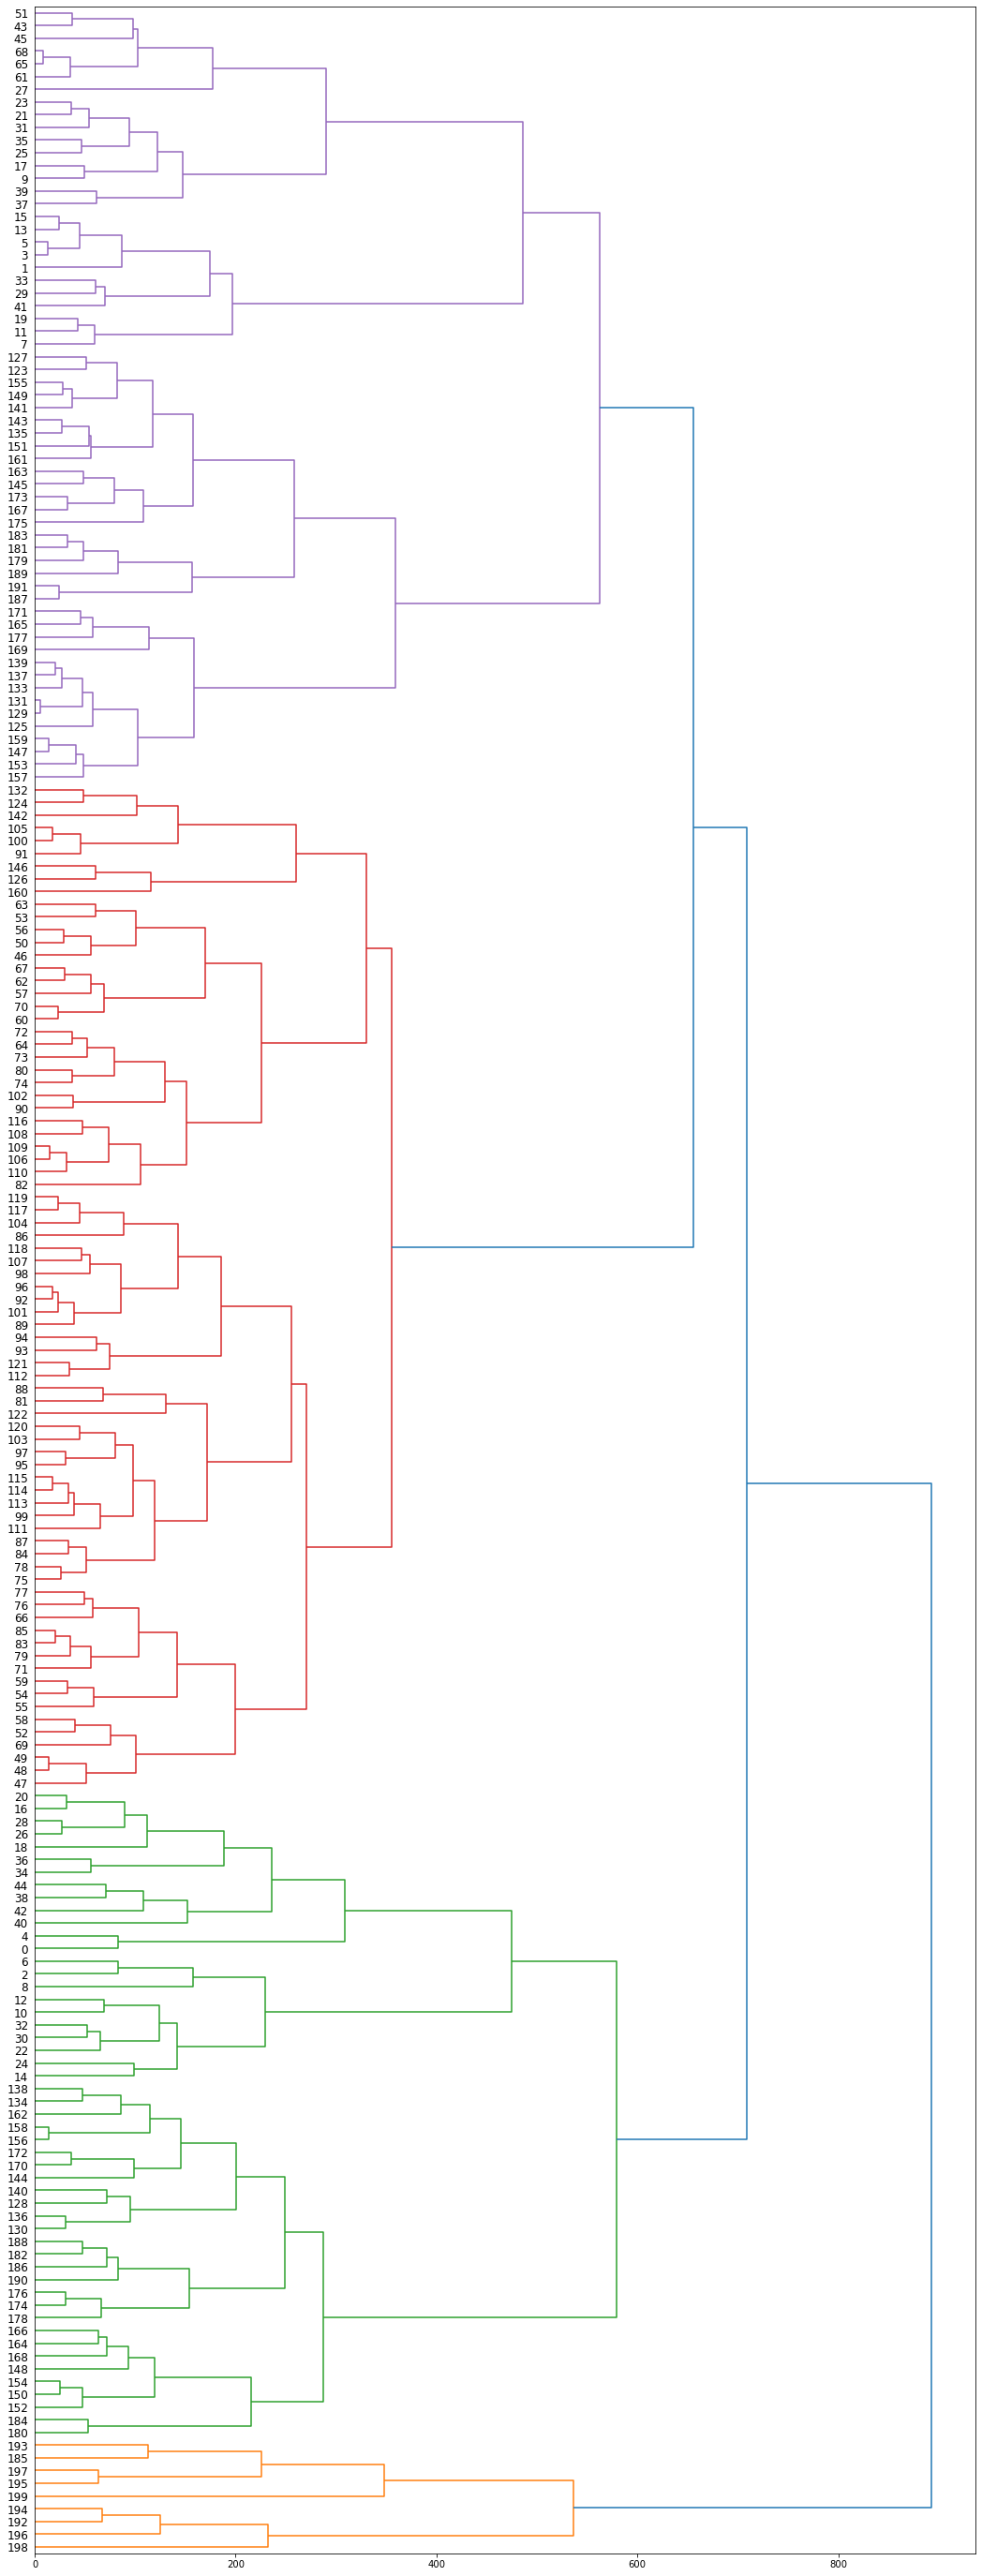

In [11]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

/var/folders/vz/qkzndqyn4p312z66d9kvrt6w0000gn/T/ipykernel_6767/2848005678.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


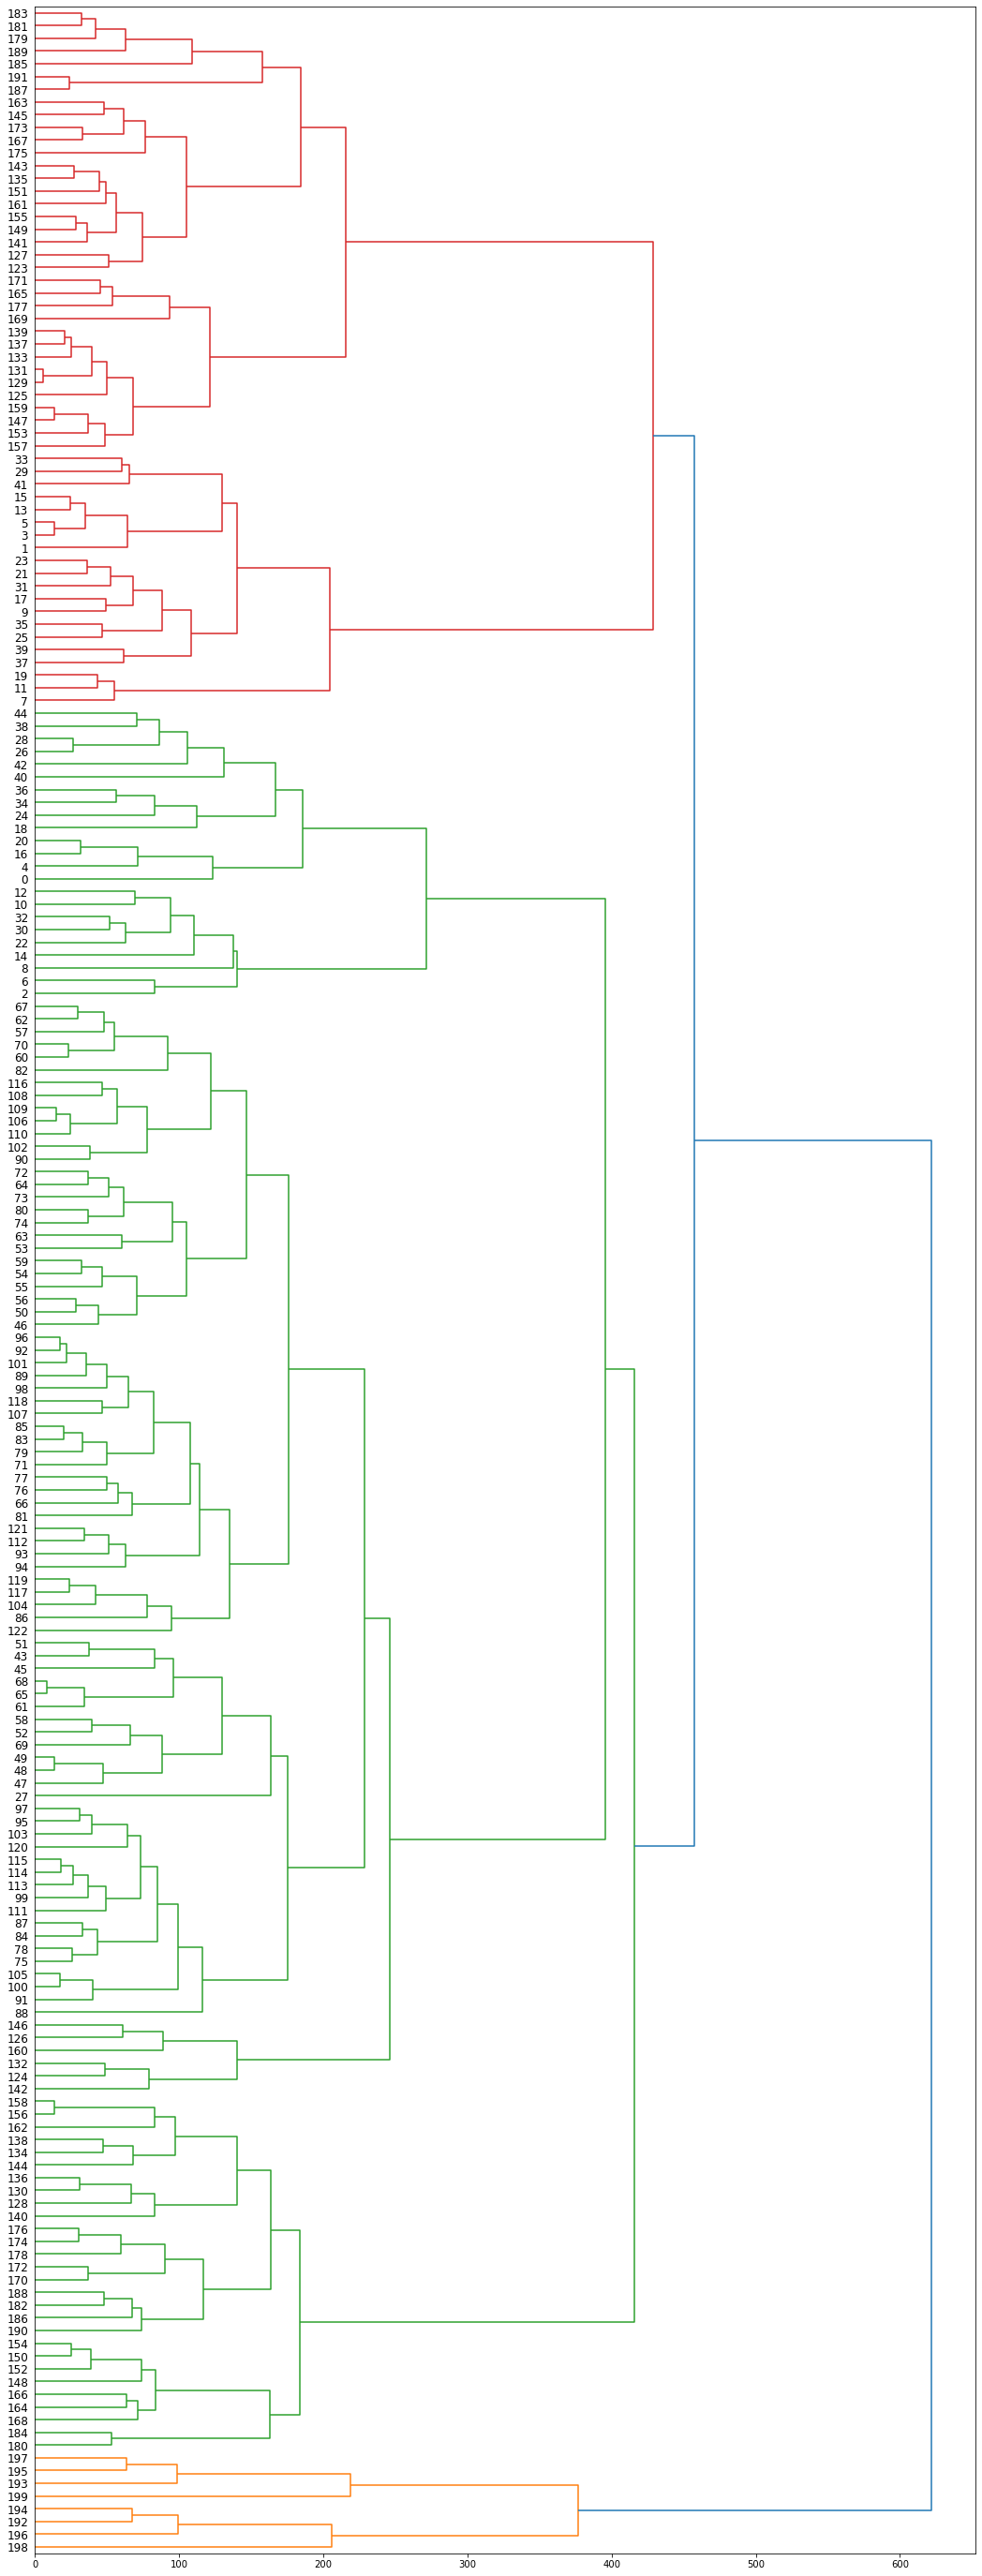

In [12]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

/Users/yaxingpan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


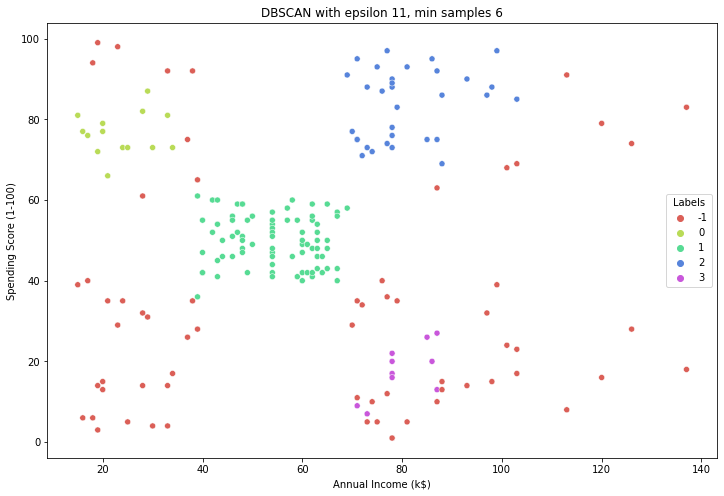

In [13]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()
